In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
fast_food_df = pd.read_csv('Data\WA_Marketing-Campaign.csv')

# Objective

![Fast Food Promotion](https://cureandcraft.com/wp-content/uploads/2024/03/Fast-Food.jpg)

To determine if the three different promotion types for fast food are statistically different from each other, and if so, identify which promotion is the most effective in terms of sales.

# Findings from EDA

I have performed exploratory data analysis (EDA) in the EDA.ipynb file and will make decisions based on the findings. To see all the visualizations, please refer to the EDA.ipynb file.

These are the findings that were the most relevant.

In [4]:
colors = ["#e60049", "#0bb4ff", "#50e991"]

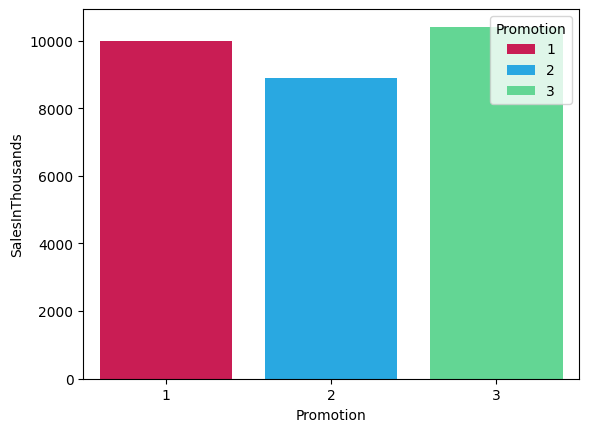

In [19]:
sales_sum = fast_food_df.groupby('Promotion')['SalesInThousands'].sum().reset_index()
sns.barplot(x='Promotion', y='SalesInThousands', data=sales_sum, hue='Promotion', palette=colors)
plt.show()

In [32]:
sales_sum 10,200.775

,Promotion,SalesInThousands
0,1,9993.03
1,2,8897.93
2,3,10408.52


Promotion 3 has the highest total sales, followed by Promotion 1, and Promotion 2.

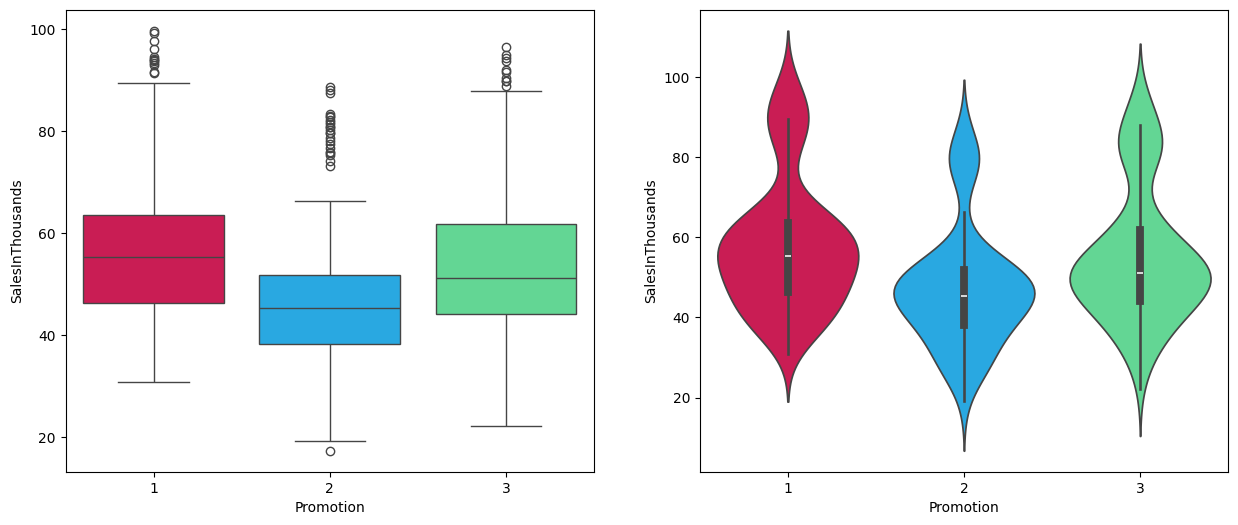

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes = axes.flatten()

sns.boxplot(x='Promotion', y='SalesInThousands', data=fast_food_df, hue='Promotion', palette=colors, ax=axes[0])
sns.violinplot(x='Promotion', y='SalesInThousands', data=fast_food_df, hue='Promotion', palette=colors, ax=axes[1])
for ax in axes:
    ax.legend([],[], frameon=False)
plt.show()

* Therer are no extreme outliers in the data.
* Promotion 1 has a slightly higher median than Promotion 3, and Promotion 2 has the lowest median.
* The area of highest concentration of sales for Promotion 1 is greater than the highest concentrations for Promotions 2 and 3.

Looking at this, it appears that Promotion 1 and Promotion 3 are fairly similar and Promotion 2 is less effective. Now, let's test if these results are statistically significant.

# Hypothesis Testing

## Experimental Design

*    H0 (null hypothesis): There is no difference in sales between Promotion 1, Promotion 2, and Promotion 3.
*    H1 (alternative hypothesis): There is a difference in sales between Promotion 1, Promotion 2, and Promotion 3.
*    Significance level: 0.05
*    Confidence level: 95%
*    Statistical test: one-way ANOVA, Tukey's test

# Perform Statistical Test

## ANOVA

In [25]:
promotion_1 = fast_food_df[fast_food_df['Promotion'] == 1]['SalesInThousands']
promotion_2 = fast_food_df[fast_food_df['Promotion'] == 2]['SalesInThousands']
promotion_3 = fast_food_df[fast_food_df['Promotion'] == 3]['SalesInThousands']
f_oneway(promotion_1, promotion_2, promotion_3)

F_onewayResult(statistic=np.float64(21.953485793080677), pvalue=np.float64(6.765849261408714e-10))

The obtained p-value of 6.8e-10 is significantly less than the significance level of 0.05. Therefore, we reject the null hypothesis, indicating that there are statistically significant differences in sales among the promotions.

Now that we have rejected the null hypothesis, we can proceed to perform Tukey's test to determine which promotions are considered to be statistically different.

## Tukey's test

In [26]:
data = fast_food_df['SalesInThousands']
labels = fast_food_df['Promotion']
tukey_results = pairwise_tukeyhsd(data, labels, 0.05)

print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


*    Promotion 2 shows a statistically significant difference in sales compared to the other two promotions (p ≈ 0.000001, α < 0.05).
*    There is no statistically significant difference in sales between Promotion 1 and Promotion 3 (p = 0.2444, α > 0.05), indicating that observed differences could be due to random variation.

# Conclusion

After performing ANOVA and Tukey's test, we conclude that Promotion 1 and Promotion 3 do not show a statistically significant difference from each other, while Promotion 2 is significantly different from both. However, Promotions 1 and 3 exhibit the highest sales performance. On average, choosing Promotion 1 or 3 would result in an approximate 15% increase in total monthly sales, equivalent to $1,302,000 compared to Promotion 2.